# Пересечение полуплоскостей


Наша задача состоит в том, чтобы найти пересечение полуплоскостей. Форму пересечения легко определить: полуплоскость выпукла, и пересечение выпуклых фигур тоже выпукло, так что пересечение множества полуплоскостей на плоскости - выпукло. Каждая точка на границе пересечения должна лежать на какой-то из прямой ограничивающих полуплоскость. Следовательно, область состоит из ребер, которые содержатся в этих прямых. Каждая прямая дает вклад максимум в одну сторону выпуклой оболочки, так как она выпукла. Следовательно, пересечение $n$ полуплоскостей - это выпуклая полигональная область, окруженная не более чем $n$ ребрами. На рисунке показаны разные варианты пересечения:
<img src="images/picture2.png" alt="Picutre2" width ="80%" heigth="80%" />
Черным нарисованы линии ограничивающие полуплоскость, темно-серым - часть полуплоскости, которая принадлежит границам, и светло-серым - пересечение полуплоскостей.

## Точка в пересечении полуплоскостей
<p>В некоторых случаях нам достаточно знать существует ли в пересечении полуплоскостей хоть одна точка и, соответственно, координаты этой точки. В других случаях этой информации недостаточно и требуется найти всю область, являющуюся пересечением.</p>
<p>В первую очередь рассмотрим алгоритмы для нахождения точки, лежащей в пересечении.</p>

Имеется список, содержащий $n$ полуплоскостей.

### Алгоритм
1. Берем первые две полуплоскости, $hp_1$ и $hp_2$, и пересекаем их границы. Точка пересечения $t$ - будет первым приближением ответа.
2. Итерируемся по полуплоскостям $hp_3 .. hp_n$. Пусть очередная полуплоскость - $hp_{i+1}$. Проверим, что $t$ принадлежит $hp_{i+1}$.
  1. Если принадлежит - продолжаем итерироваться.
  2. Иначе может быть два исхода: пересечение пусто или не пусто, но не включает в себя $t$. Как различить эти случаи? Пусть $l$ - граница $hp_{i+1}$. Найдём пересечение этой прямой с пересечением полуплоскостей $hp_1 .. hp_i$.
    1. В случае, если пересечение не пусто - граница $hp_{i+1}$ является гранью пересечения $hp_1 .. hp_{i+1}$, значит, если взять одну из точек пересечения границы $hp_{i+1}$ с пересечением $hp_1 .. hp_i$, то мы получим следующее приближение для $t$. Несложно понять, что новая точка $t$ лежит во всех полуплоскостях $hp_1 .. hp_{i+1}$. Продолжим итерироваться с новым $t$.
    2. Если пересечение - пусто, то ответа нет. Выходим из функции.

#### Время работы
>*Алгоритм работает за $O(n^2)$*

<br>$\triangleright$<br>
<div style="padding-left:40px"> 
Внешний цикл совершает $O(n)$ итераций, в каждой из которых может запуститься поиск одномерного пересечения, на который уйдёт $O(i)$ итераций на шаге $i$. Таким образом время работы составит $\sum_{i=1}^n O(i) = O(n^2)$
</div>
$\triangleleft$

# Тут гифка с демонстрацией работы

Замечательный алгоритм, однако его время работы разочаровывает. Достаточно простым образом его можно ускорить.

### Ускоренный алгоритм
В этот раз, перед началом алгоритма, перемешаем полуплоскости случайным образом (выполним операцию _RandomShuffle_).

#### Время работы
Докажем несколько утверждений:

>*RandomShuffle работает за $O(n)$*

Такой оценки можно добиться, используя, например, предложенную реализацию _RandomShuffle_:
```python
    def RandomShuffle(list):
        for i in range(n-1, 0, -1)
            RandInd = Random(i)
            list[i], list[RandInt] = list[RandInt], list[i]
    ```
В этом коде функция _Random(i)_ выдает случайное целое число от 0 до i за константное время.

> *Ожидаемое время работы остального алгоритма $O(n)$*

Так как на вход алгоритму подается случайная перестановка - вводится термин ожидаемое время работы. Всего существует $n!$ перестановок списка из n объектов, и каждая из них - равновероятна и имеет своё время работы. Ожидаемое время работы алгоритма - это время, усреднённое по всем n! перестановкам.

<br>$\triangleright$<br>
<div style="padding-left:40px">
<p>Проанализируем время, необходимое для добавления новой полуплоскости. Оно константно, если предпологаемый ответ не изменяется, однако в противном случае - линейно от количества уже добавленных полуплоскостей.</p>
<p>Введем $X_i$ - случайную величину, которая равна 1, если $t_{i-1} \notin hp_i$, и 0 в противном случае. Таким образом время работы алгоритма для конкретной перестановки можно оценить величиной $\sum_{i=1}^n O(i)*X_i$. Чтобы найти оценку сверху для ожидаемого значения этой суммы, воспользуемся свойством **линейности математического ожидания** $E[\sum_{i=1}^n O(i)*X_i] = \sum_{i=1}^n O(i)*E[X_i]$.</p>
<p>Здесь $E[X_i]$ равно вероятности того, что $t_{i-1} \notin hp_i$. Проанализируем эту вероятность.</p>
<p>Рассмотрим алгоритм "с конца". Пусть алгоритм находится на некотором шаге $i$. При этом текущее приближение ответа $t_i$ - вершина границы пересечения полуплоскостей $hp_1,..,hp_i$, назовем эту границу - $C_i$. Поскольку $t_i$ - вершина $C_i$, то она определяется по меньшей мере двумя полуплоскостями. Вероятность того, что нам пришлось вычислять новую оптимальную вершину при добавлении $hp_i$ равна вероятности того, что оптимальная вершина изменится при удалении полуплоскости из $C_i$. Но последнее происходит не более чем для двух полуплоскостей из множества $\{hp_1,..,hp_i\}$. Поскольку полуплоскости добавляются в случайном порядке, вероятность того, что $hp_i$ - одна из этих двух полуплоскостей, не превышает $\frac{2}{i}$. Таким образом $E[X_i] <= \frac{2}{i}$</p>
<p>Теперь можно выписать верхнюю оценку времени работы этой части алгоритма: $\sum_{i=1}^n O(i)*\frac{2}{i} = O(n)$</p>
</div>
$\triangleleft$

Общее время работы алгоритма: $O(n)$

### Упражнение
Реализуйте функцию, возвращающую точку из пересечения полуплоскостей.

In [ ]:
from geomlib import *
from tests import full_test_point
from random import shuffle

# Points represented as     : (x, y).
# To create point object call Point(x, y).

# Lines represented as      : (a, b, c) from equality   ax + by + c = 0.
# To create line object call Line(a, b, c).

# Halfplanes represented as : (a, b, c) from inequality ax + by + c <= 0.
# To create halfplane object call HalfPlane(a, b, c).

# For Line defined intersect(Line) function. 
# It returns a common Point of two Lines, if it exists, 
# otherwise it returns None.

# For HalfPlane defined intersect(HalfPlane) function.
# It returns a common Point of borders of two HalfPlanes,
# if it exists, otherwise, if one HalfPlane is included in another,
# it returns some point on a border of that HalfPlane,
# otherwise it returns None.

# You can write 
#     if Point in HalfPlane 
# to check if HalfPlane contains Point.

# Input : list of HalfPlanes.
# Result: Point in an intersection of HalfPlanes or None, if intersection is Empty.
def get_intersection_point(hp):
    return None
    
full_test_point(get_intersection_point)

## Пересечение полуплоскостей
Теперь рассмотрим алгоритм для нахождения области, являющейся пересечением полуплоскостей. Стоит определить как хранить нашу выпуклую полигональную область $C$. Будем хранить левую и правую границу $C$ отдельно, как отсортированные массивы полуплоскостей. Массивы будут отсортированы в порядке их возникновения на границе, если бы мы спускались сверху вниз. Обозначим массив левых границ оболочки $C$ как $L\_left$, а массив правых границ $L\_right$. Вершины оболочки явно хранить не будем, их можно легко найти как результат пересечения двух соседних границ в массиве. 

Чтобы упростить описание алгоритма, предположим, что у нас нет горизонтальных рёбер (алгоритм может быть легко адаптирован, если предположить, что горизонтальные ребра, которые ограничивают сверху, принадлежат левой границе, а снизу - правой). Сам алгоритм устроен по принципу разделяй и властвуй. Мы делим весь массив полуплоскостей на два одинаковых массива и вызываемся рекурсивно от них. Мы получаем два выпуклых полигональных региона $C1$ и $C2$ и считаем их пересечение. Пример работы ниже:
<img src="images/picture4.png" alt="Picutre4" width ="50%" heigth="50%" />

Давайте разберемся, как считать пересечение.

### Алгоритм пересечения 

<img src="images/picture3.png" alt="Picutre3" width ="40%" heigth="40%" style="float:right;" />
Алгоритм пересечения работает по принципу сканирующей прямой. Мы двигаем вниз нашу прямую, и смотрим, с какими прямыми из $C1$ и $C2$ она пересекается (так как $C1$ и $C2$ выпуклые, то прямая может пересечь не более 4 ребер). Мы не будем хранить их в сложной структуре данных, а просто заведем указатели на них $left\_edge\_C1$, $right\_edge\_C1$, $left\_edge\_C2$, и $right\_edge\_C2$. Если сканирующая прямая не пересекает какую-нибудь границу, то соответствующий указатель будет равен $null$.

Как инициализировать эти указатели. Пусть $y1$ будет $y$-координатой самой высокой вершины $C1$. Если $C1$ не ограничена, то зададим $y1=infinity$. Также инициализируем $y2$ и пусть $y\_start = min(y1,y2)$. Чтобы посчитать пересечение с $C1$ и $C2$ мы можем переместить наше внимание на часть плоскости с $y$-координатой меньшей или равной $y\_start$. Тогда найдем пересечение граней с нашей сканирующей прямой $y\_start$ и определим начальные $left\_edge\_C1$, $right\_edge\_C1$, $left\_edge\_C2$, и $right\_edge\_C2$.

Обычно в такого рода алгоритмах мы должны иметь очередь, чтобы хранить события. В нашем случае события - это точки, в которых ребра $C1$ или $C2$ начинают или заканчивают пересекать сканирующую прямую. Это означает, что следующее событие, которое определяет следующую грань, которая должна быть обработана, является самым высоким из нижних концов ребер, пересекающих сканирующую прямую. Значит, нам не нужна очередь, мы можем найти следующее событие за константное время используя указатели  $left\_edge\_C1$, $right\_edge\_C1$, $left\_edge\_C2$, и $right\_edge\_C2$.

В каждой точке события появляется новая граничная сторона $e$. Для обработки $e$ мы должны сначала определить принадлежит ли она $C1$ или $C2$ и находится ли на левой или на правой границе, а затем вызвать соответствующую функцию. Здесь будет рассмотрена только функция для случая, когда $e$ принадлежит левой границе $C1$. Остальные функции аналогичны.

Пусть $p$ - верхняя точка e. Функция, которая обрабатывает $e$ может найти одну из трёх сторон, которые может иметь $C$: сторона с верхней точкой $p$, сторона с верхней точкой $e \cap left\_edge\_C2 $ или сторона с верхней точкой $e \cap right\_edge\_C2 $. Будем выполнять следующие действия:
- <img src="images/picture6.png" alt="Picutre6" width ="50%" style="float:right;" />Сначала проверим, лежит ли p между $left\_edge\_C2$ и $right\_edge\_C2$. Если да, то $e$ добавляет грань в $C$ начиная с $p$. В таком случае добавляем полуплоскость, которой принадлежит $e$ в список $L\_left$ для $C$.
- Потом проверяем, пересекает ли $e$ $right\_edge\_C2$. Если да, тогда точка пересечения это вершина $C$. Или обе грани создадут по грани в $C$, которые начинаются в точке пересечения - такое бывает, когда точка $p$ лежит слева от $right\_edge\_C2$. В таком случае мы добавляем полуплоскость из которой мы получили $e$ в $L\_left$ и $right\_edge\_C2$ в $L\_right$. Или обе грани создадут по грани в $C$, которые заканчиваются в точке пересечения. Тогда мы их никуда не добавляем, они уже были обработаны ранее.
- <img src="images/picture7.png" alt="Picutre7" width="20%" style="float:right;" />Последняя проверка производится на пересечение $e$ и $left\_edge\_C2$. Если есть пересечение, то оно является вершиной в $C$. Сторона $C$, начинающаяся в этой вершине, — это либо часть $e$, либо часть $left\_edge\_C2$.  Различить эти два случая можно за константное время: Если $p$ лежит слева от $left\_edge\_C2$ тогда это часть $e$, иначе это часть $left\_edge\_C2$. Как только мы решили, какой полуплоскости принадлежит новая сторона, нужно добавить ее в $L\_left$.

Заметим, что может получиться так, что функция добавит две полуплоскости к ответу. Ограниченную $e$ и ограниченную $left\_edge\_C2$. Указанный выше порядок гарантирует корректное размещение этих полуплоскостей относительно друг друга — сначала $e$, затем $left\_edge\_C2$.

#### Корректность
Чтобы доказать корректность алгоритма мы должны доказать, что мы добавляем полуплоскости, определяющие ребра $C$ в правильном порядке. Возьмем грань $C$, и пусть $p$ будет его верхней точкой. Тогда $p$ также верхняя точка какой-либо грани в $C1$ или $C2$ или пересечение двух граней в $C1$ и $C2$. В первом случае мы добавляем грань в $C$ как только достигли p, а во втором, как только достигли самой низкой из верхних точек граней, которые пересеклись. Значит мы добавили все грани, которые принадлежат $C$. Теперь докажем, что мы это сделали в правильном порядке. Пусть какие-то две грани $e'$ и $e$ стоят относительно друг друга в неправильном порядке и $e'$ встречается раньше при спуске сверху вниз. Так как мы итерируемся по массиву и порядок граней не меняется, то ошибка произошла когда мы находили пересечение $C1$ и $C2$. Рассмотрим шаг, на котором $e'$ была добавлена. На этом шаге верхняя точка $e$ еще не встретилась, так как если бы она встречалась, то $e$ была бы добавлена, ведь она есть в конечном пересечении. Но тогда есть какая-то часть, принадлежащая пересечению, которая лежит выше покрытия $e$. И значит $e'$ стоит на своем месте. Получили противоречие. Значит наш алгоритм работает корректно.

#### Время работы
Обработка ребра в алгоритме пересечения занимает константное время, так что пересечение двух выпуклых полигональных регионов занимает $O(N)$.

>*Время работы алгоритма - $O(NlogN)$*

<br>$\triangleright$<br>
<div style="padding-left:40px">
<p>Пусть $T(N)$ - время, необходимое для нахождения пересечения $N$ полуплоскостей, тогда для рассмотренного алгоритма справедливо: $T(N) = 2T(N/2) + O(N)$.</p>
<p>По мастер-теореме $T(N) = O(NlogN)$.</p>
</div>
$\triangleleft$

Докажем более общее утверждение.

>*Пересечение $N$ полуплоскостей может быть найдено за $\Theta(NlogN)$ и это оптимально.*

<br>$\triangleright$<br>
<div style="padding-left:40px">
<p>Верхняя граница доказана в утверждении выше, докажем нижнюю границу.</p>
<p>Чтобы её доказать - покажем как с помощью алгоритма пересечения полуплоскостей можно выполнить сортировку.</p>
<p>Пусть даны $N$ вещественных чисел $x_1,..,x_N$, определим $H_i$, как полуплоскость, чья граница является касательной в точке $(x_i, x_i^2)$ к параболе $y = x^2$, то есть прямой $y = 2x_ix-x_i^2$. Пересечением этих полуплоскостей будет выпуклый полигональный регион, в котором последовательные ребра упорядочены по наклону. Как только пересечение найдено - мы можем прочитать значения $x_i$ в отсортированном порядке.</p>
</div>
$\triangleleft$

In [ ]:
# %matplotlib tk

# Иллюстрация сведения сортировки чисел к пересечению полуплоскостей
from visualisation import draw_sorting_vis

draw_sorting_vis()

### Упражнение 1
Реализуйте функции, которые обрабатывают $e$.

In [ ]:
from geomlib import *
from tests import help_func_test

# For each of this functions:
# Input: objects, that described in the algotithm above
# Result: list of left border HalfPlanes, list of right border HalfPlanes

def first_left_func(e, le_C2, re_C2, p):
    return [], []

def first_right_func(e, le_C2, re_C2, p):
    return [], []

def second_left_func(le_C1, re_C1, e, p):
    return [], []

def second_right_func(le_C1, re_C1, e, p):
    return [], []

help_func_test(first_left_func, first_right_func, second_left_func, second_right_func)

### Упражнение 2
Реализуйте функцию intersect.

In [ ]:
from geomlib import *
from tests import full_test

# Input : list of HalfPlanes.
# Result: list of left border HalfPlanes, list of right border HalfPlanes.

def hp_intersect(H_in):
    H_len = len(H_in)

    # If we got one HalfPlane - there is nothing to intersect.
    if H_len == 1:
        if H_in[0].orientation_downright():
            return [H_in[0]], []
        else:
            return [], [H_in[0]]

    # Split list into two sublists.
    H_len_l = int(H_len / 2)
    H1 = H_in[:H_len_l]
    H2 = H_in[H_len_l:]

    C1 = hp_intersect(H1)
    C2 = hp_intersect(H2)
    C = intersect(C1, C2)
    return C

# Write this function.
def intersect(C1, C2):
    return [], []


full_test(hp_intersect)

## Связь с выпуклой оболочкой

Будем считать, что имеется функция, умеющая находить выпуклую оболочку множества точек. В этом пункте рассмотрим способы позволяющие найти пересечение полуплоскостей одним или несколькими запусками функции поиска выпуклой оболочки.

Напомню неравенство, задающее полуплоскость $hp_i:$ $A_ix+B_iy+C_i\le0$.

### Способ 1

Пусть дано произвольное множество полуплоскостей. Рассмотрим подмножество ориентированных вниз полуплоскостей (аналогично рассматривается подмножество ориентированных вверх, что делать с вертикальными будет сказано ниже). Ориентированность вниз даёт $B_i\ge0$ для всех полуплоскостей.

Рассмотрим простейший алгоритм нахождения пересечения полуплоскостей в таком случае:
1. Отсортируем полуплоскости по убыванию углового коэффициента границы ($\frac{A_i}{-B_i}$).
2. Добавим первые две полуплоскости в ответ.
3. Для каждой последующей полуплоскости проверяем включает ли она точку пересечения последних двух полуплоскостей. Если да - то просто добавим её к ответу. Иначе - выкинем из ответа последнюю полуплоскость и повторим проверку.
4. После рассмотрения всех полуплоскостей получим их пересечение.

# Здесь можно проиллюстрировать алгоритм

#### Наблюдение
>*Предикат проверки того, что полуплоскость $l_3: A_3x+B_3y+C_3\le0$ включает в себя точку пересечения прямых $l_1: A_1x+B_1y+C_1=0$ и $l_2: A_2x+B_2y+C_2=0$ соответствует знаку определителя 
$$
\begin{vmatrix}
A_1 && B_1 && C_1 \\
A_2 && B_2 && C_2 \\
A_3 && B_3 && C_3
\end{vmatrix}
$$*

<br>$\triangleright$<br>
<div style="padding-left:40px">
Пусть $(x_0, y_0)$ - точка пересечения $l_1$ и $l_2$, тогда при $A_3x_0 + B_3y_0 + C_3\le0$ точка пересечения будет входить в $l_3$.

Найдём $(x_0, y_0)$:

$$
x_0
=
\frac
{
\begin{vmatrix}
-C_1 && B_1 \\
-C_2 && B_2
\end{vmatrix}
}
{
\begin{vmatrix}
A_1 && B_1 \\
A_2 && B_2
\end{vmatrix}
}; 
y_0
=
\frac
{
\begin{vmatrix}
A_1 && -C_1 \\
A_2 && -C_2
\end{vmatrix}
}
{
\begin{vmatrix}
A_1 && B_1 \\
A_2 && B_2
\end{vmatrix}
}
$$

Подставим это решение в уравнение и домножим на определитель:

$$
A_3\begin{vmatrix}-C_1 && B_1 \\ -C_2 && B_2\end{vmatrix} + B_3\begin{vmatrix}A_1 && -C_1 \\ A_2 && -C_2\end{vmatrix} + C_3\begin{vmatrix}A_1 && B_1 \\ A_2 && B_2\end{vmatrix} =
$$

$$
= A_3\begin{vmatrix}B_1 && C_1 \\ B_2 && C_2\end{vmatrix} - B_3\begin{vmatrix}A_1 && C_1 \\ A_2 && C_2\end{vmatrix} + C_3\begin{vmatrix}A_1 && B_1 \\ A_2 && B_2\end{vmatrix} = \begin{vmatrix}A_1 && B_1 && C_1 \\ A_2 && B_2 && C_2 \\ A_3 && B_3 && C_3\end{vmatrix}
$$

Отсортированность полуплоскостей по наклону даёт $\begin{vmatrix} A_1 && B_1 \\ A_2 && B_2 \end{vmatrix}\le0$.
Таким образом:

$$
\begin{vmatrix}A_1 && B_1 && C_1 \\ A_2 && B_2 && C_2 \\ A_3 && B_3 && C_3\end{vmatrix}\ge0
$$
</div>
$\triangleleft$

Заметим, что это похоже на проверку предиката поворота. Тогда приведенный выше алгоритм пересечения полуплоскостей, будет очень похож на алгоритм Грэхема для поиска выпуклой оболочки.

#### Двойственность пересечения полуплоскостей выпуклой оболочке

Вспомним про двойственное преобразование. Прямой в исходном пространстве можно сопоставить точку в двойственном и наоборот. В данном случае мы можем сопоставить каждой полуплоскости $A_ix+B_iy+C_i\le0$ точку в однородных координатах $(A_i, C_i, B_i)$. 

Назовем каждую границу полуплоскости исходного пространства $l_i$, тогда в двойственном пространстве им будут соответствовать точки $l_i^\star$.

Посмотрим на нижнюю огибающую множества $\{l_i\}$, назовём её $\mathcal{LE}$. Рассмотрим две соседние прямые $l_p$ и $l_q$, принадлежащие $\mathcal{LE}$. Обозначим их пересечение как $pq$. В двойственном пространстве $pq^\star$ является прямой, включающей в себя точки $l_p^\star$ и $l_q^\star$, по первому свойству двойственного пространства. 

В исходном пространстве точка $pq$ лежит ниже всех $\{l_i\} \setminus \{l_p, l_q\}$. В двойственном это эквивалентно тому, что все $\{l_i^\star\}\setminus \{l_p^\star, l_q^\star\}$ лежат ниже $pq^\star$, по второму свойству двойственного пространства. Это условие является достатоным для того, чтобы ребро $pq^\star$ принадлежало верхней выпуклой оболочке и, соответственно, точки $p^\star$, $q^\star$ принадлежат верхней выпуклой оболочке, назовем её $\mathcal{UH}$. 

Можно прийти к выводу: $\mathcal{UH}$ полученного множества точек в двойственном пространстве будет соответствовать $\mathcal{LE}$ полуплоскостей в исходном, что будет являться границей пересечения полуплоскостей. 

Наклон полуплоскости задаётся как $\frac{A_i}{-B_i}$, $x$ координата точки в двойственном пространстве задаётся как $\frac{A_i}{B_i}$. Из этого следует, что порядок полуплоскостей, принадлежащих нижней огибающей будет соответствовать порядку точек верхней выпуклой оболочки.

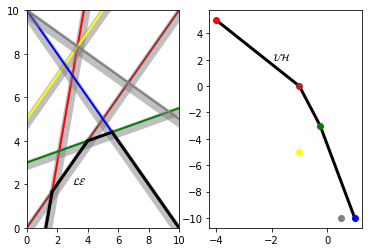

In [1]:
%matplotlib notebook

from visualisation import draw_dual_transform

# Иллюстрация дуального преобразования
# Первый рисунок - набор полуплоскостей в исходном пространстве
# Второй рисунок - в двойственном
draw_dual_transform()

На рисунке выше можно видеть, как пересечение полуплоскостей в исходном пространстве переходит в верхнюю выпуклую оболочку в двойственном.

#### Детали реализации

Как получить верхнюю выпуклую оболочку используя один вызов функции поиска выпуклой оболочки и минимум дополнительных действий?

Добавим ещё одну полуплоскость $0 \cdot x + 0 \cdot y + -1 \le 0$. Эта полуплоскость допускает все конечные точки пространства, таким образом она не уменьшит искомое пересечение. Двойственной ей точкой в однородных координатах будет $(0, -1, 0)$, что является точкой $(0, -\infty)$ - бесконечно удаленной вниз по $y$ точкой.

Запустим алгоритм поиска выпуклой оболочки на полученном множестве точек и точке $(0, -1, 0)$. Если из полученного ответа убрать ребра, смежные с точкой $(0, -1, 0)$, то получим верхнюю выпуклую оболочку исходного множества точек.

Используя рассказанный выше механизм можно описать алгоритм, который решает поставленную задачу. 
#### Алгоритм
Пусть есть произвольное множество полуплоскостей, тогда алгоритм выглядит следующим образом:
1. Разделить множество полуплоскостей на ориентированные вверх, ориентированные вниз и вертикальные.
2. Решить задачу для первых двух множеств.
3. Для вертикальных полуплоскостей выбрать самую правую, смотрящую вправо, и самую левую, смотрящую влево (соответственно левую и правую границу).
3. Пересечь ответ для полуплоскостей, смотрящих вниз, с ответом для полуплоскостей, смотрящих вверх и ограничить это левой и правой границей.

#### Время работы

Каждый из запусков функции поиска выпуклой оболочки требует $O(n \cdot \log{h})$, где $h$ - количество точек в ответе. Остальные действия отработают за $O(n)$ операций. 

Получили общее время работы алгоритма - $O(n \cdot \log{h})$

### Способ 2

В прошлом способе не нравилось то, что от нас требуется много дополнительных действий: разделить полуплоскости на множества, дважды вызвать алгоритм поиска выпуклой оболочки, пересечь полученные цепочки. Рассмотрим другой подход.

Пусть дано произвольное множество полуплоскостей.

В первую очередь найдем точку, принадлежащую всем полуплоскостям. Если такой точки нет, то выходим из функции с результатом "Пересечение пусто".

Передвинем систему координат таким образом, чтобы общая точка стала точкой $(0, 0)$. Пусть $(p, q)$ - координаты общей точки, тогда нам необходимо сдвинуть все на вектор $(-p, -q)$. Неравенство полуплоскости примет следующий вид: $A_i(x+p)+B_i(y+q)+C_i\le0$, что эквивалентно: 

$$A_ix+B_iy+(C_i+A_ip+B_iq)\le0$$

То есть, изменится только коэффициент $C_i$. Более того, новое значение $C_i$ у всех полуплоскостей будет одного знака. В самом деле, пусть полуплоскость задается неравенством $A_ix+B_iy+C_i \le 0$, тогда при подстановке точки $(0, 0)$, которую полуплоскость теперь точно включает, получим $C_i \le 0$.

Полуплоскостям $(A_i, B_i, C_i)$ в исходном пространстве поставим в соответствие однородные точки $p_i=(A_i, B_i, C_i)$ в двойственном пространстве.

В этот момент логично предположить, что достаточно построить выпуклую оболочку по этим точкам и получить правильный ответ на исходную задачу. Но это не так. Такая конструкция не позволяет различить случай, когда пересечение полуплоскостей неограничено (чтобы в этом убедиться, достаточно запустить функцию *draw_unbounded()* в блоке кода ниже). 

In [ ]:
%matplotlib notebook

from visualisation import draw_unbounded

# draw_unbounded иллюстрирует что произойдет, если исходное пересечение неограничено
# и мы забыли учесть точку (0, 0)
draw_unbounded()

Решим эту проблему следующим образом: добавим к множеству полуплоскостей "бесконечную полуплоскость" $0 \cdot x + 0 \cdot y -1 \le0$, которая допускает все конечные точки плоскости, то есть никак не влияет на ответ. В двойственном пространстве ей соответствует однородная точка $(0, 0, -1)$, или просто $(0, 0)$. Теперь, в случае если точка $(0, 0)$ принадлежит выпуклой оболочке, то пересечение полуплоскостей неограничено.

In [ ]:
%matplotlib notebook

from visualisation import draw_second_dual_transform

# Иллюстрация дуального преобразования
# Первый рисунок - исходное пространство
# Второй рисунок - исходное пространство, после сдвига
# Третий рисунок - двойственное пространство, в котором черная точка - точка (0, 0)
draw_second_dual_transform()

На иллюстрации выше к уже знакомому набору полуплоскостей была добавлена полуплоскость, ограничивающая пересечение снизу. В качестве точки из пересечения в данном случае была выбрана точка $(4, 2)$, хоть в прикладных алгоритмах обычно и берется точка с границы пересечения.

Коротко алгоритм можно описать следующим образом:

1. Найти точку, принадлежащую всем полуплоскостям.
2. Передвинуть начало системы координат в эту точку.
3. Преобразовать полуплоскости в однородные точки $(A_i, B_i, C_i)$ в двойственном пространстве.
4. Найти выпуклую оболочку по полученному множеству точек и точке $(0, 0)$.
5. Ответом будет являться полученная выпуклая оболочка без точки $(0, 0)$.

#### Время работы

Поиск точки, принадлежащей пересечению, можно выполнить за $O(n)$. Поиск выпуклой оболочки - за $O(n \cdot \log{h})$, где $h$ -  количество точек в ответе. На остальные действия уйдет не больше $O(n)$ действий.

Таким образом общее время работы алгоритма: $O(n \cdot \log{h})$.

### Способ 3

Прошлый способ требовал предъявить точку из пересечения. Хотим обойтись без этого.

Пусть дано множество полуплоскостей, без каких-либо дополнительных условий. Хотим найти их пересечение используя только функцию, вычисляющую выпуклую оболочку.

#### Движение полуплоскостей

Преобразуем наши полуплоскости следующим образом:

$$
A_ix + B_iy + C_i \le 0 \rightarrow A_ix + B_iy - t + C_i \le 0
$$

, где t будем считать временем.

Пусть в некоторый момент времени $t=c$ пересечение было не пусто, увеличим $t$ - полуплоскости разъедутся в направлении нормалей их границ и площадь пересечения увеличится. Если будем уменьшать $t$ - движение будет происходить в обратную сторону, площадь пересечения станет уменьшаться до тех пор, пока пересечение не станет пустым. 

На $t=\infty$ пересечение будет занимать всю плоскость. Напротив, при $t=-\infty$ пересечения точно не было.

Наша задача состоит в том, чтобы найти пересечение полуплоскостей при $t=0$. Очевидно, что пересечение будет не пустым, если оно перестало быть пустым в момент времени $t\le0$.

#### Переход к  трехмерным координатам

Начиная с этого момента будем считать, что t - это третья координата, тогда наши полуплоскости становятся полупространствами 

$$A_ix+B_iy-z+C_i\le0$$

Условие $t\le0$ становится полупространством $z\le0$.

Таким образом, если пересечение полупространств $\{hp_i\} \cup \{z\le0\}$ - не пусто, то исходное пересечение полуплоскостей - не пусто. Более того, если мы получили пересечение полупространств, то ответом на исходную задачу будут все полупространства из ответа за исключением $z\le0$.

#### Переход к двойственному пространству

Для нахождения пересечения полупространств перейдем в двойственное пространство следующим образом. Сопоставим каждому полупространству $(A_i, B_i, -1, C_i)$ однородную точку $p_i = (A_i, B_i, C_i, -1)$, или, после деления на $-1$:

$$(-A_i, -B_i, -C_i, 1)$$

$z\le0$, очевидно, станет точкой $(0, 0, 0, 1)$, назовем её точкой $zero$.

Аналогично двумерному случаю, искомому пересечению полупространств будет соответствовать нижняя по оси z выпуклая оболочка точек в двойственном пространстве. Найти её можно, добавив $0 \cdot x + 0 \cdot y + 0 \cdot z + 1 \le 0$ к множеству полупространств. Это полупространство допускает все конечные точки, и двойственная ему точка будет иметь однородные координаты $(0, 0, 1, 0)$, то есть $(0, 0, \infty)$ - бесконечно удаленная по $z$ точка. Назовем эту точку $infinity$.

#### Заключение

Чтобы найти ответ строим выпуклую оболочку по множеству точек $\{p_i\} \cup \{zero\} \cup \{infinity\}$. Если точка $zero$ не принадлежит выпуклой оболочке, то пересечение пусто. Пусть $zero$ принадлежит выпуклой оболочке. Тогда все смежные ей вершины выпуклой оболочки будут являться искомым ответом. Если точке $zero$ также смежна точка $infinity$, то исходное пересечение неограничено.

Коротко алгоритм можно описать следующим образом:

1. Преобразуем полуплоскости $A_ix+B_iy+C_i\le0 \rightarrow A_ix+B_iy-z+C_i\le0$.
2. Преобразуем полуплоскости $A_ix+B_iy-z+C_i \le 0$ в точки в двойственном пространстве с однородными координатами $p_i = (A_i, B_i, C_i, -1)$ (можно сделать одновременно с первым пунктом).
3. Ищем выпуклую оболочку по множеству точек $\{p_i\} \cup \{(0, 0, 0, 1)\} \cup \{(0, 0, 1, 0)\}$.
4. Восстанавливаем по полученной оболочке ответ на исходную задачу.

#### Время работы

Поиск выпуклой оболочки требует $O(n \cdot \log{n})$ операций. Остальные действия займут не больше, чем $O(n)$ операций.

Таким образом общее время работы составит $O(n \cdot \log{n})$.

In [ ]:
%matplotlib notebook

from visualisation import draw_third_dual_transform

# Иллюстрация дуального преобразования
draw_third_dual_transform()